<a href="https://colab.research.google.com/github/Mahjabeen24/Detecting-Lane-Lines/blob/master/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/udacity/CarND-LaneLines-P1

fatal: destination path 'CarND-LaneLines-P1' already exists and is not an empty directory.


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3481600/45929032 bytes (7.6%)7315456/45929032 bytes (15.9%)11157504/45929032 bytes (24.3%)15024128/45929032 bytes (32.7%)18997248/45929032 bytes (41.4%)22953984/45929032 bytes (50.0%)26853376/45929032 bytes (58.5%)30793728/45929032 bytes (67.0%)34783232/45929032 bytes (75.7%)38920192/45929032 bytes (84.7%)42885120/45929032 bytes (93.4%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import math

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(image, lines):
    line_image=np.zeros_like(image)
    if lines is not None:
        for line in lines:
           x1, y1, x2, y2 = line.reshape(4)
           cv2.line(line_image, (x1, y1), (x2, y2), [255,0,0], 2)
    return line_image

def draw_lines1(image, lines):
    line_image=np.zeros_like(image)
    if lines is not None:
        for line in lines:
           x1, y1, x2, y2 = line.reshape(4)
           cv2.line(line_image, (x1, y1), (x2, y2), [255,0,0], 80)
    return line_image

def weighted_img(initial_img, img, α=0.8, β=1., γ=1.):
    return cv2.addWeighted(initial_img, α, img, β, γ)

def weighted_img1(initial_img, img, α=0.6, β=2., γ=1.):
    return cv2.addWeighted(initial_img, α, img, β, γ)


def process_image(image):
    blur=gaussian_blur(image,5)
    cany=canny(blur,50,150)
    blur1=gaussian_blur(cany,5)
    height=blur1.shape[0]
    triangle=np.array([[(120,height),(910,height),(490,300)]])
    roi=region_of_interest(blur1,triangle)
    lines=cv2.HoughLinesP(roi, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5 )
    line_image=draw_lines(blur,lines)
    combo_image=weighted_img(blur, line_image)
    return combo_image

def process_image1(image):
    blur=gaussian_blur(image,5)
    cany=canny(blur,50,150)
    blur1=gaussian_blur(cany,5)
    height=blur1.shape[0]
    triangle=np.array([[(150,height),(4300,height),(2600,2000)]])
    roi=region_of_interest(blur1,triangle)
    lines=cv2.HoughLinesP(roi, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5 )
    line_image=draw_lines1(blur,lines)
    combo_image=weighted_img1(blur, line_image)
    return combo_image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


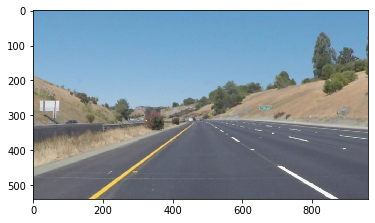

In [0]:
#reading in an image
image = mpimg.imread('/content/CarND-LaneLines-P1/test_images/solidYellowCurve2.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


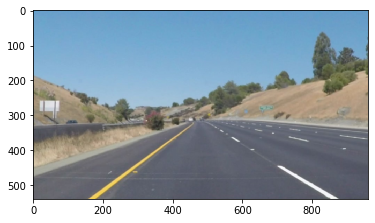

In [0]:
blur=gaussian_blur(image,5)
print('This image is:', type(image), 'with dimensions:', blur.shape)
plt.imshow(blur,cmap='gray')

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960)


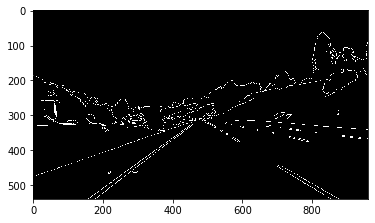

In [0]:
cany=canny(blur,50,150)
print('This image is:', type(image), 'with dimensions:', cany.shape)
plt.imshow(cany,cmap='gray')

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960)


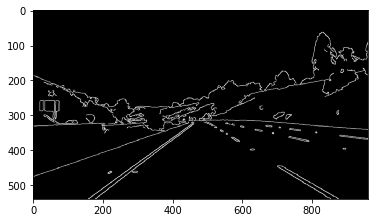

In [0]:
blur1=gaussian_blur(cany,5)
print('This image is:', type(image), 'with dimensions:', blur1.shape)
plt.imshow(blur1,cmap='gray')

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960)


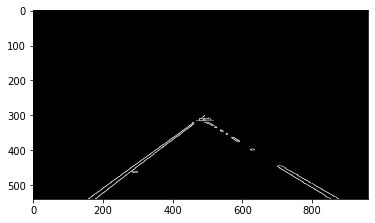

In [0]:
height=blur1.shape[0]
triangle=np.array([[(120,height),(910,height),(490,300)]])

roi=region_of_interest(blur1,triangle)
print('This image is:', type(image), 'with dimensions:', roi.shape)
plt.imshow(roi,cmap='gray')

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


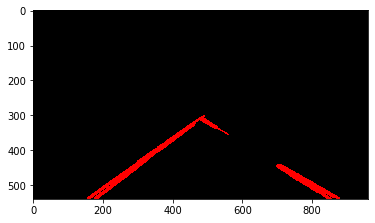

In [0]:
lines=cv2.HoughLinesP(roi, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5 )
line_image=draw_lines(blur,lines)
print('This image is:', type(image), 'with dimensions:', line_image.shape)
plt.imshow(line_image,cmap='gray')

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


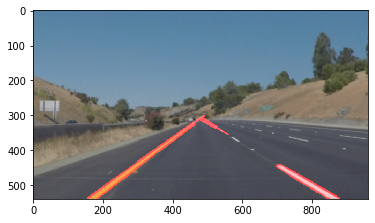

In [0]:
combo_image=weighted_img(blur, line_image)
print('This image is:', type(image), 'with dimensions:', combo_image.shape)
plt.imshow(combo_image,cmap='gray')

In [0]:
import os
os.listdir("/content/CarND-LaneLines-P1/test_images")

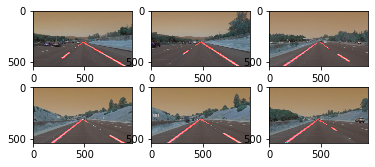

In [0]:
import os
i=1
for filename in os.listdir('/content/CarND-LaneLines-P1/test_images'):
    img=cv2.imread(os.path.join('/content/CarND-LaneLines-P1/test_images',filename))
    im2=process_image(img)
    plt.subplot(3,3,i)
    plt.imshow(im2,cmap='gray')
    i=i+1

In [0]:
white_output = '/content/CarND-LaneLines-P1/test_videos_output/solidWhiteRight.mp4'
clip1 = VideoFileClip("/content/CarND-LaneLines-P1/test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

In [0]:
challenge_output = '/content/CarND-LaneLines-P1/test_videos_output/challenge.mp4'
clip1 = VideoFileClip("/content/CarND-LaneLines-P1/test_videos/challenge.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(challenge_output, audio=False)

In [0]:
yellow_output = '/content/CarND-LaneLines-P1/test_videos_output/yellow.mp4'
clip1 = VideoFileClip("/content/CarND-LaneLines-P1/test_videos/solidYellowLeft.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(yellow_output, audio=False)

This image is: <class 'numpy.ndarray'> with dimensions: (3472, 4624, 3)


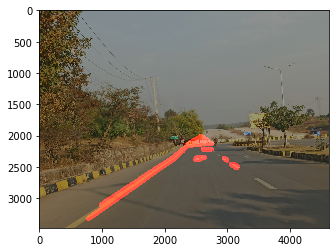

In [0]:
image = mpimg.imread('/content/mehji/IMG_20191229_150545.jpg')
image=process_image1(image)
#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

In [31]:
own_output = '/content/CarND-LaneLines-P1/test_videos_output/own.mp4'
clip1 = VideoFileClip("/content/mehji/VID-20191230-WA0001.mp4").subclip(0,15)
white_clip = clip1.fl_image(process_image1) #NOTE: this function expects color images!!
%time white_clip.write_videofile(own_output, audio=False)

[MoviePy] >>>> Building video /content/CarND-LaneLines-P1/test_videos_output/own.mp4
[MoviePy] Writing video /content/CarND-LaneLines-P1/test_videos_output/own.mp4


100%|█████████▉| 900/901 [00:20<00:00, 43.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/CarND-LaneLines-P1/test_videos_output/own.mp4 

CPU times: user 13.7 s, sys: 643 ms, total: 14.3 s
Wall time: 21.1 s
